In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/Otus/text_processing/spectacle.csv')
data.head()

,rating,description
0,9.6,Мюзикл идет с антрактом. Забронируйте с...
1,9.7,Премьера комедийного мюзикла от продюсеров Mam...
2,8.7,«Идеальный муж» - комедия Оскара Уайльда с лов...
3,9.6,«Анна Каренина» — мировой шедевр на одном дыха...
4,9.1,Мюзикл «Граф Орлов» — Театральный блокбастер! ...


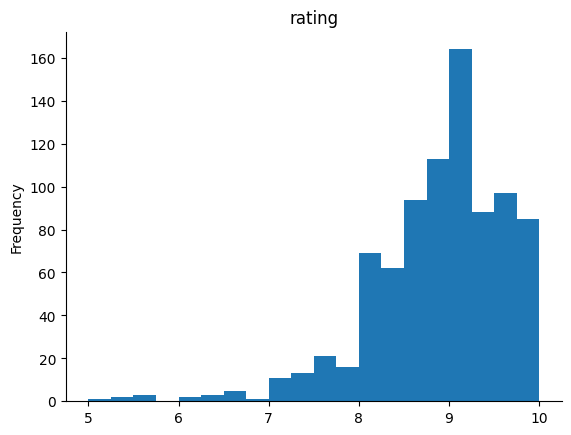

In [4]:
# @title rating

from matplotlib import pyplot as plt
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Предобработка текста

## Удаляем стоп слова

In [7]:
import nltk

In [24]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

# примеры стоп-слов
print(len(stop_words))
print(stop_words[:10])

stop_words = stop_words + ['xix', 'xx']

151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import re
regex = re.compile(r'[А-Яа-яA-zёЁ-]+')

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text)).lower() # to lower case
    except:
        return ""

words_only('Казнить, нельзя помиловать!!! 2023 год')

'казнить нельзя помиловать год'

In [26]:
def process_data(data):
    word_tokenizer = nltk.WordPunctTokenizer() # знаки препинания (группами) идут в один токен

    texts = []
    targets = []
    i = 0
    n = data.shape[0]

    # поочередно проходим по всем новостям в списке
    for index, row in data.iterrows():
        if i%50==0:
            print(f'{i} fom {n}')
        i = i+1
        text_lower = words_only(row['description']) # оставим только слова
        tokens     = word_tokenizer.tokenize(text_lower) #разбиваем текст на слова

        # удаляем пунктуацию и стоп-слова
        tokens = [word for word in tokens if (word not in stop_words and not word.isnumeric())]

        texts.append(tokens) # добавляем в предобработанный список

    return texts

In [27]:
y = list(data['rating'])
texts = process_data(data)

0 fom 850
50 fom 850
100 fom 850
150 fom 850
200 fom 850
250 fom 850
300 fom 850
350 fom 850
400 fom 850
450 fom 850
500 fom 850
550 fom 850
600 fom 850
650 fom 850
700 fom 850
750 fom 850
800 fom 850


In [28]:
# example
i = 1
print("Label: ", y[i])
print("Tokens: ", texts[i][:10])

Label:  9.7
Tokens:  ['премьера', 'комедийного', 'мюзикла', 'продюсеров', 'mamma', 'mia', 'призрак', 'оперы', 'chicago', 'шахматы']


In [29]:
!pip install pymorphy2

In [30]:
# загружаем библиотеку для лемматизации
import pymorphy2 # Морфологический анализатор

# инициализируем лемматизатор :)
morph = pymorphy2.MorphAnalyzer()

In [31]:
from tqdm import tqdm_notebook
# применяем лемматизацию ко всем текстам
for i in tqdm_notebook(range(len(texts))):           # tqdm_notebook создает шкалу прогресса :)
   text_lemmatized = [morph.parse(x)[0].normal_form for x in texts[i]] # применяем лемматизацию для каждого слова в тексте
   texts[i] = ' '.join(text_lemmatized)                # объединяем все слова в одну строку через пробел

<ipython-input-31-90620d87dfe8>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(texts))):           # tqdm_notebook создает шкалу прогресса :)


  0%|          | 0/850 [00:00<?, ?it/s]

In [32]:
# посмотрим на пример
i = 1
print("Label: ",   y[i])
print("Text: \n",  texts[i])

Label:  9.7
Text: 
 премьера комедийный мюзикл продюсер mamma mia призрак опера chicago шахматы шоу пойти бояться ты директор завод хотеть подарить жена настоящий мюзикл остаться сторона требовать бедный постановщик изменение один нелепый другой день премьера градус безумие достигать предел режиссёр нужно добавить шоу новый номер ход переписать музыка слово попутно разругаться - этот изменение весь актёр остроумный пародия мировой поп - хит каскад смешной ситуация мастер - класс режим реальный время спасти шоу час показ один чрезвычайно весёлый спектакль


## Моделирование & Векторные представления

In [33]:
#train test_split
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_y, test_y = train_test_split(texts, y, test_size=0.2, random_state=42)


In [39]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features = 1000, norm = None, min_df = 3, max_df = 700)
# Обучаем TF-IDF на train, а затем применяем к train и test
train_X = vectorizer.fit_transform(train_texts)
test_X  = vectorizer.transform(test_texts)
# Топ-10 слов
vectorizer.get_feature_names_out()[:100]

array(['абсолютно', 'автор', 'авторский', 'актриса', 'актуальный',
       'актёр', 'актёрский', 'актёрский состав', 'александр', 'алексей',
       'американский', 'анастасия', 'анатолий', 'английский', 'андрей',
       'анна', 'анна каренин', 'ансамбль', 'антон', 'антракт',
       'антракт ссылка', 'арт', 'артист', 'артист россия', 'артистка',
       'артистка россия', 'артём', 'атмосфера', 'бабушка', 'бедный',
       'безумный', 'бесконечный', 'билет', 'благодаря', 'близкий',
       'блистательный', 'бог', 'богатый', 'богомолов', 'боль', 'больший',
       'большой', 'борис', 'борьба', 'бояться', 'брак', 'брат', 'бросить',
       'будущее', 'булгаков', 'буфет', 'буфет начало', 'бывший', 'быт',
       'бытовой', 'быть', 'важно', 'важный', 'валентина', 'валерий',
       'вампилов', 'василий', 'ваш', 'ведущий', 'век', 'великий',
       'великолепный', 'вера', 'верить', 'вернуться', 'верный', 'версия',
       'вести', 'весь', 'весёлый', 'вечер', 'вечный', 'вещь',
       'взаимоотношение', 

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

alpha = 0.5  # параметр регуляризации
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(train_X, train_y)

y_train_pred = ridge_reg.predict(train_X)
y_test_pred = ridge_reg.predict(test_X)

# Метрики для оценки качества модели
train_mse = mean_squared_error(train_y, y_train_pred)
test_mse = mean_squared_error(test_y, y_test_pred)

train_r2 = r2_score(train_y, y_train_pred)
test_r2 = r2_score(test_y, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")

Train MSE: 0.0000
Test MSE: 2.2627
Train R^2: 1.0000
Test R^2: -3.3894


## Визуализируем коэффициенты регрессии для первых 50 слов

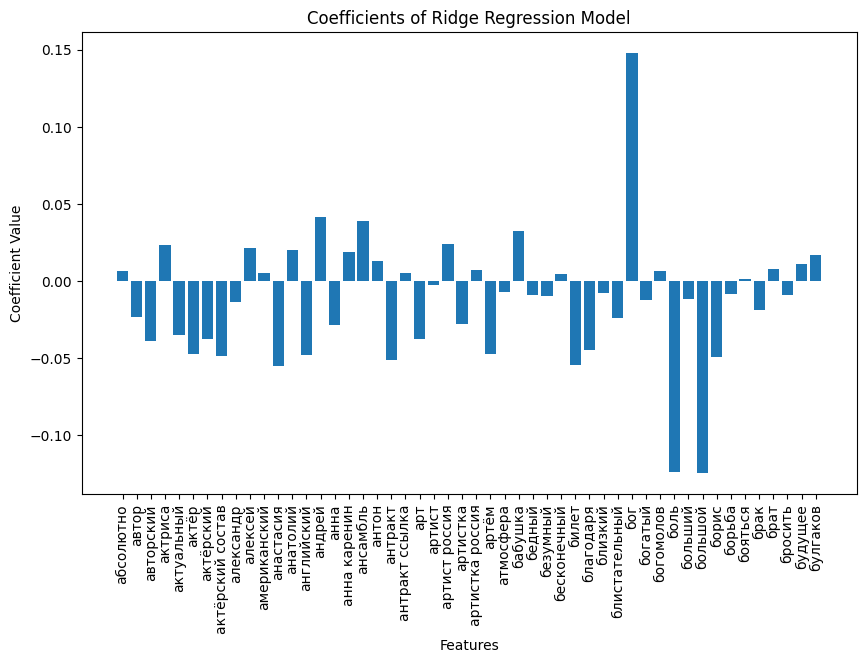

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
n=50
plt.bar(range(n), ridge_reg.coef_[0:n])
plt.xticks(range(n), vectorizer.get_feature_names_out()[0:n], rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Ridge Regression Model')
plt.show()

Вывод: Наиболее сильно на рейтинг спектакля влияет наличие слов: большой, боль, бог